### All Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve


In [2]:
# Read dataset
df = pd.read_csv('DataSets/Salary_Data_Based_country_and_race.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
df.count()

Unnamed: 0             6704
Age                    6702
Gender                 6702
Education Level        6701
Job Title              6702
Years of Experience    6701
Salary                 6699
Country                6704
Race                   6704
dtype: int64

In [5]:
# checking for missing values
df.isna().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [6]:
df.nunique()

Unnamed: 0             6704
Age                      41
Gender                    3
Education Level           7
Job Title               193
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

In [7]:
# dropping column, not needed
df = df.drop(columns=['Unnamed: 0'])

In [8]:
# dropping all rows with missing values
df.dropna(inplace=True)

### Some Visualization

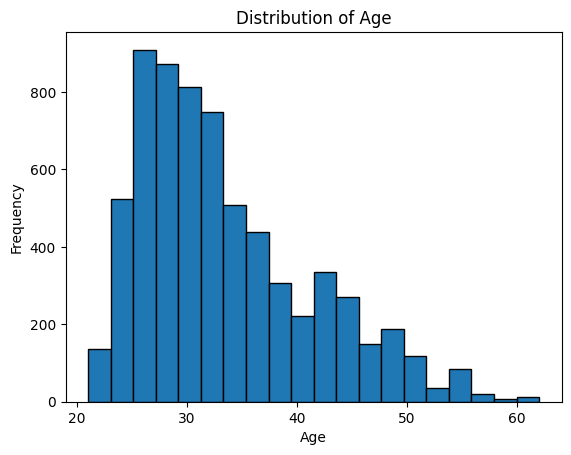

In [9]:
# Histograms show the distribution of a numeric variable.

plt.hist(df['Age'], bins=20, edgecolor = 'k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

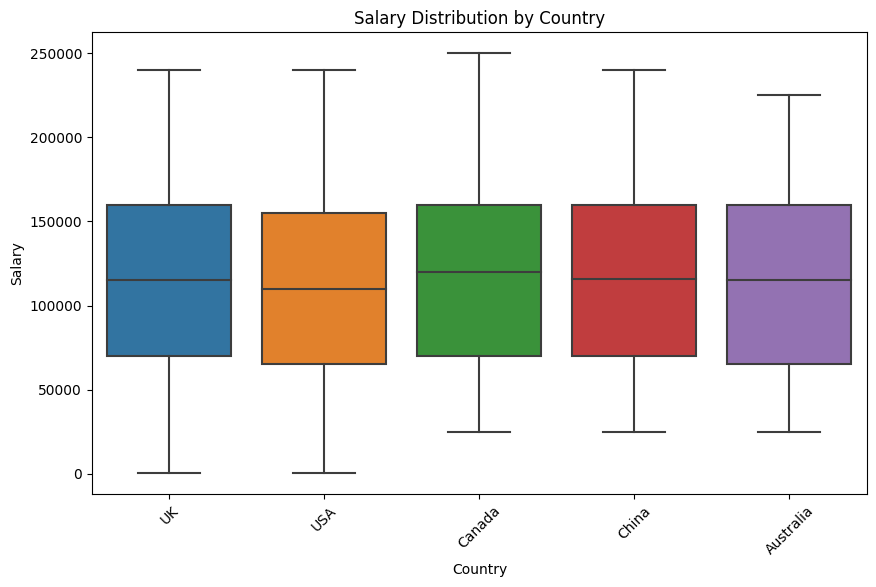

In [10]:
# Box plots help visualize the distribution and identify outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Salary', data=df)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary Distribution by Country')
plt.xticks(rotation=45)
plt.show()

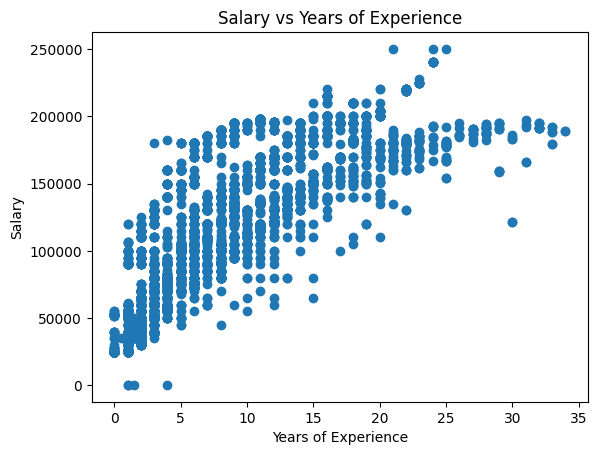

In [11]:
# Scatter plots show the relationship between two numeric variables.

plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


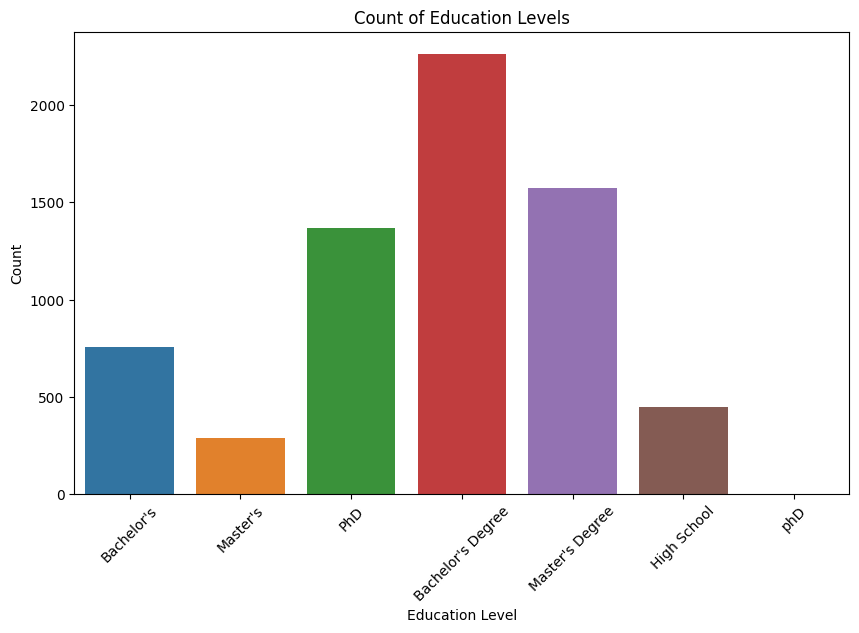

In [12]:
# Count plots display the count of categorical variables.

plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.xticks(rotation=45)
plt.show()


In [13]:
#  Plotly allows for interactive visualizations.


fig = px.scatter(df, x='Age', y='Salary', color='Country')
fig.update_layout(title='Salary vs Age by Country')
fig.show()


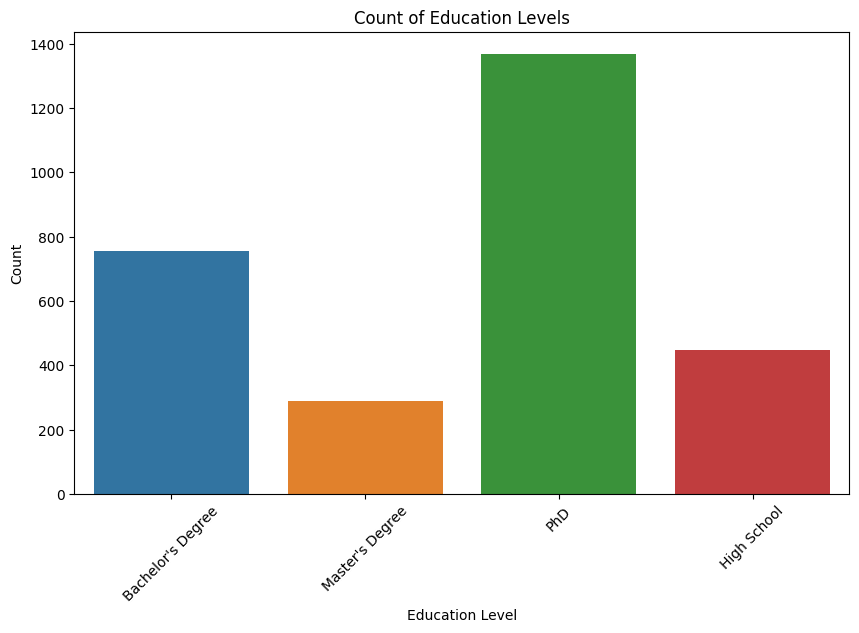

In [14]:
# Clean up and standardize education level values
education_mapping = {
    "Master's": "Master's Degree",
    "Bachelor's": "Bachelor's Degree",
    "PhD": "PhD",
    "phD": "PhD",  # Assuming 'phD' is a typo
    "High School": "High School"
}

df['Education Level'] = df['Education Level'].map(education_mapping)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.xticks(rotation=45)
plt.show()


### Handling Categorical Variables

In [15]:
# Handling Categorical Variables

df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title', 'Country', 'Race'], drop_first=True)


In [16]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [17]:
# Splitting data to test and train
train_features, test_features, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training features
train_features_scaled = scaler.fit_transform(train_features)

# Transform the testing features using the same scaler
test_features_scaled = scaler.transform(test_features)

### Creating Functions for Different Algorithm

In [19]:
# Function to train and evaluate a linear regression model
def train_linear_regression(train_features, train_target, test_features, test_target):
    model = LinearRegression()
    model.fit(train_features, train_target)
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_target, predictions)
    r2 = r2_score(test_target, predictions)
    return model, mse, r2

# Function to train and evaluate a decision tree regressor model
def train_decision_tree(train_features, train_target, test_features, test_target):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(train_features, train_target)
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_target, predictions)
    r2 = r2_score(test_target, predictions)
    return model, mse, r2

# Function to train and evaluate a random forest regressor model
def train_random_forest(train_features, train_target, test_features, test_target):
    model = RandomForestRegressor(random_state=42)
    model.fit(train_features, train_target)
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_target, predictions)
    r2 = r2_score(test_target, predictions)
    return model, mse, r2

In [20]:
# Train and evaluate linear regression
linear_model, linear_mse, linear_r2 = train_linear_regression(train_features_scaled, train_target, test_features_scaled, test_target)
print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression R2: {linear_r2}")

print('')

# Train and evaluate decision tree regressor
tree_model, tree_mse, tree_r2 = train_decision_tree(train_features_scaled, train_target, test_features_scaled, test_target)
print(f"Decision Tree MSE: {tree_mse}")
print(f"Decision Tree R2: {tree_r2}")
print('')

# Train and evaluate random forest regressor
forest_model, forest_mse, forest_r2 = train_random_forest(train_features_scaled, train_target, test_features_scaled, test_target)
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest R2: {forest_r2}")

Linear Regression MSE: 1.9926129382940922e+31
Linear Regression R2: -6.988046346105391e+21

Decision Tree MSE: 84093679.6336667
Decision Tree R2: 0.9705085458695406

Random Forest MSE: 71858670.54248744
Random Forest R2: 0.9747993345586564


### Model Performance Interpretation

#### Linear Regression:

The **Linear Regression** model exhibits very high Mean Squared Error (MSE) and a negative R-squared (R2) score, indicating poor performance on the dataset. The exceedingly high values of these metrics raise concerns, suggesting that the model might be overly complex for the data or influenced by other factors.

#### Decision Tree Regressor:

On the other hand, the **Decision Tree Regressor** model demonstrates a lower MSE and a high R2 score, nearing 1. These metrics suggest that the model effectively captures underlying patterns within the data and fits well. However, caution is advised, particularly regarding the potential for overfitting. If the model's performance on the training set significantly surpasses that on the testing set, overfitting could be occurring.

#### Random Forest Regressor:

Similar to the Decision Tree Regressor, the **Random Forest Regressor** also yields a lower MSE and a high R2 score, indicating robust performance. Notably, Random Forest models often handle overfitting more effectively than individual Decision Trees due to ensemble averaging.

**In summary**, based on the presented metrics, both the Decision Tree Regressor and Random Forest Regressor appear to perform well on the given dataset. However, it is crucial to undertake further analysis and validation steps. This should include cross-validation, hyperparameter tuning, and exploration of additional evaluation metrics to ensure the models' robustness and their ability to generalize effectively to unseen data.


In [21]:


# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


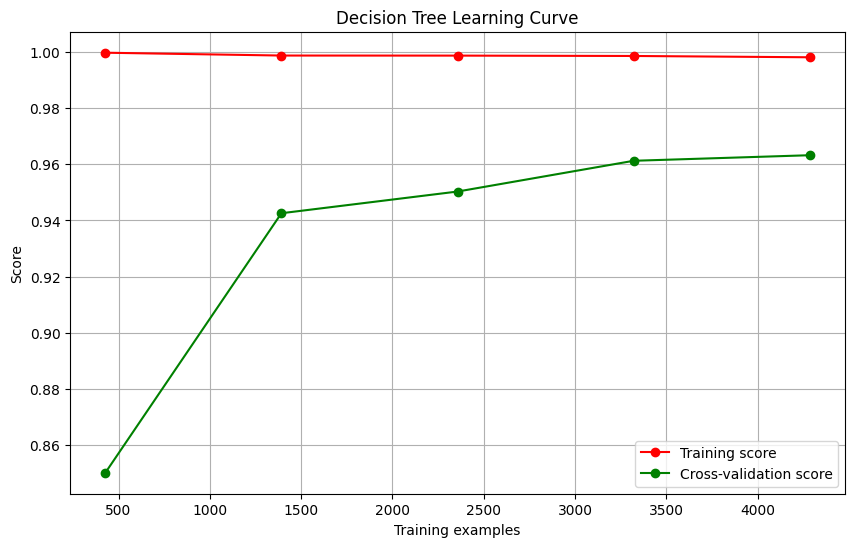

In [22]:
plot_learning_curve(tree_model, "Decision Tree Learning Curve", train_features_scaled, train_target, cv=5)
